# Read and merge the human gastrula data with the PCW3 data

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

# # ## continue Scanpy in python
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
readRDS = robjects.r['readRDS']

sc.settings.set_figure_params(dpi=150)

# Read human gastrula data
Downloaded from the website "http://www.human-gastrula.net". <br />
Richard C.V. Tyser et.al., 'A spiatially resoloved single cell atlas of human gastrulation'.<br />
https://www.biorxiv.org/content/10.1101/2020.07.21.213512v1

In [2]:
df=readRDS("/datb/home/wanglab13/PythonScripts/Cell_response/annot_umap.rds")
gstrula_mtx=readRDS("/datb/home/wanglab13/PythonScripts/Cell_response/expression_values.rds")
adata_gastrula=sc.AnnData(X=gstrula_mtx,
                         obs=df)

In [3]:
adata_gastrula.obs.set_index('cell_name',inplace=True,drop=True)
adata_gastrula.obs.index=adata_gastrula.obs.index.astype('str')
adata_gastrula.obsm['X_umap']=np.array(adata_gastrula.obs[['X0','X1']])

In [4]:
map_coarse = {}
for c in adata_gastrula.obs['cluster_id'].cat.categories:
    map_coarse[c]='Gastrula_'+c
adata_gastrula.obs['clusters']=adata_gastrula.obs['cluster_id']
adata_gastrula.obs.replace({'cluster_id_v1':map_coarse},inplace=True)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

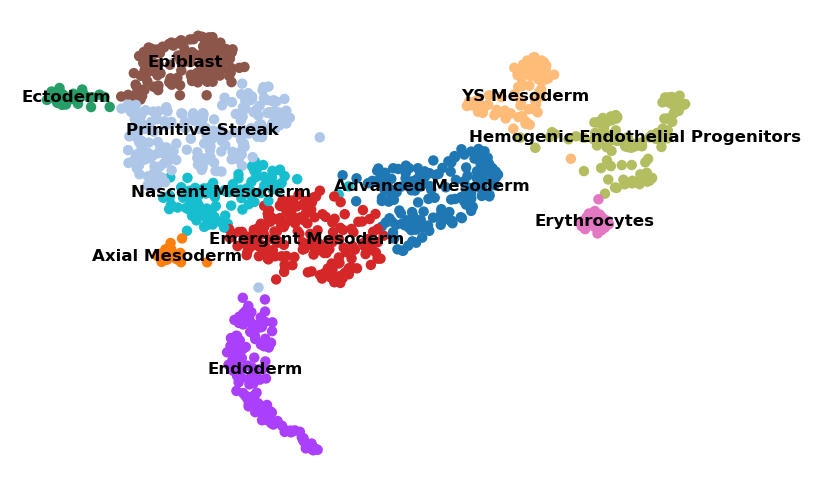

In [5]:
fig,ax=plt.subplots(figsize=(6,4))
sc.pl.umap(adata_gastrula,color='cluster_id',legend_loc='on data',ax=ax,legend_fontsize=8,frameon=False,title='',show=False)
# plt.savefig('./Paper_figures/human_gastrula_umap.pdf',dpi=300, format='pdf')

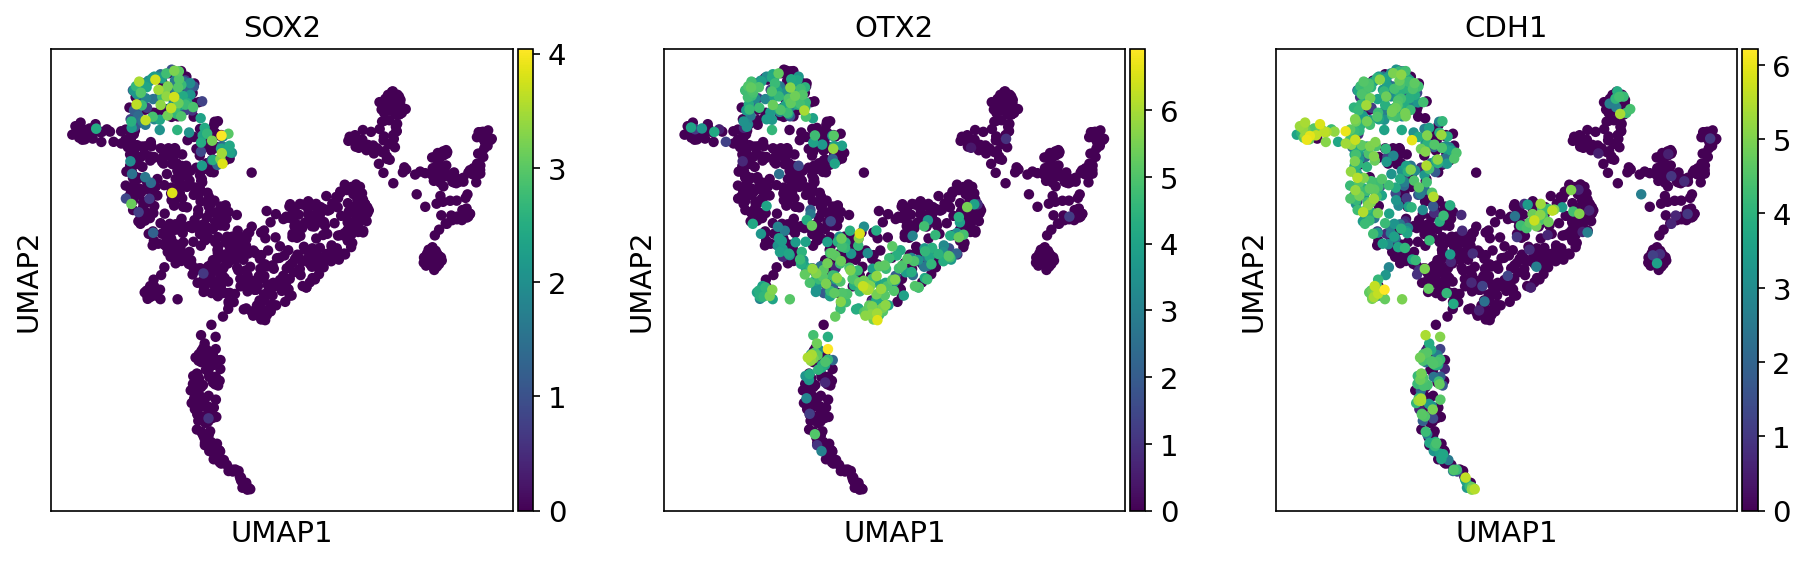

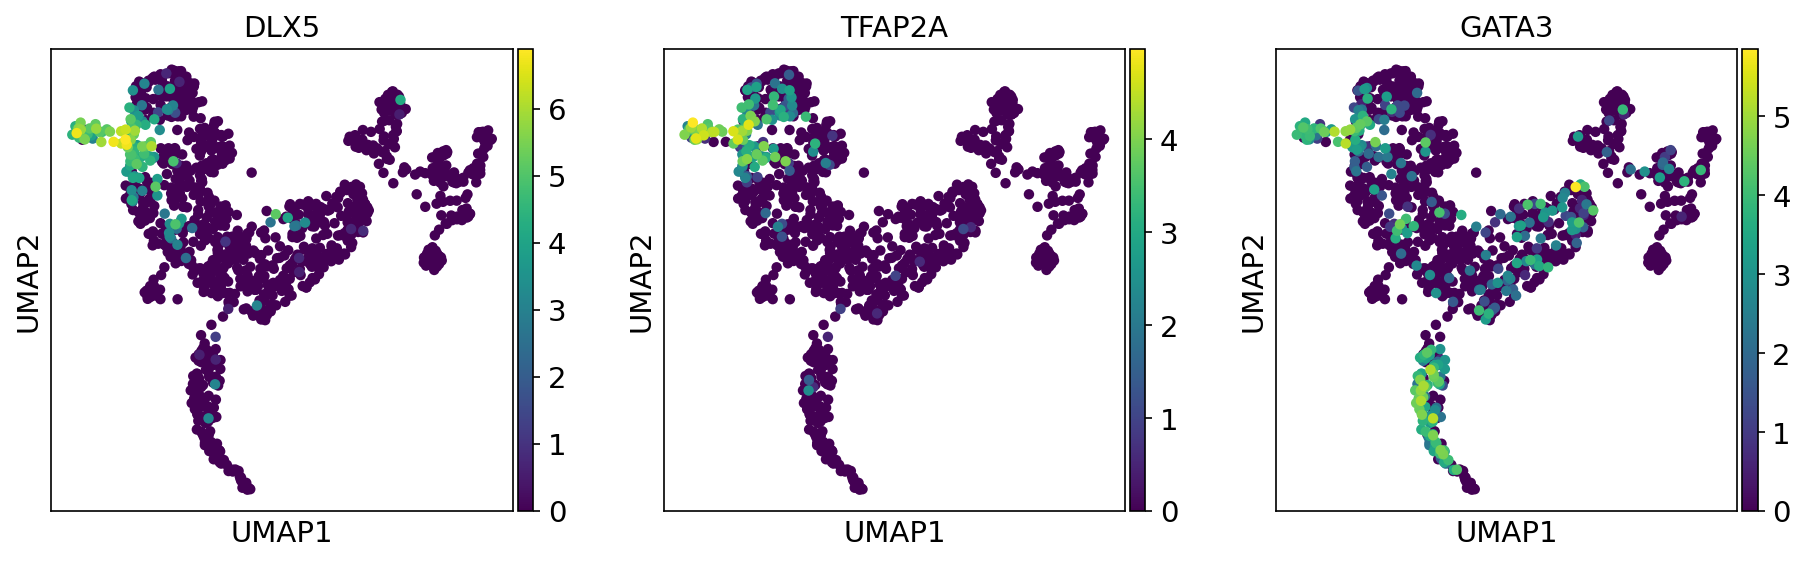

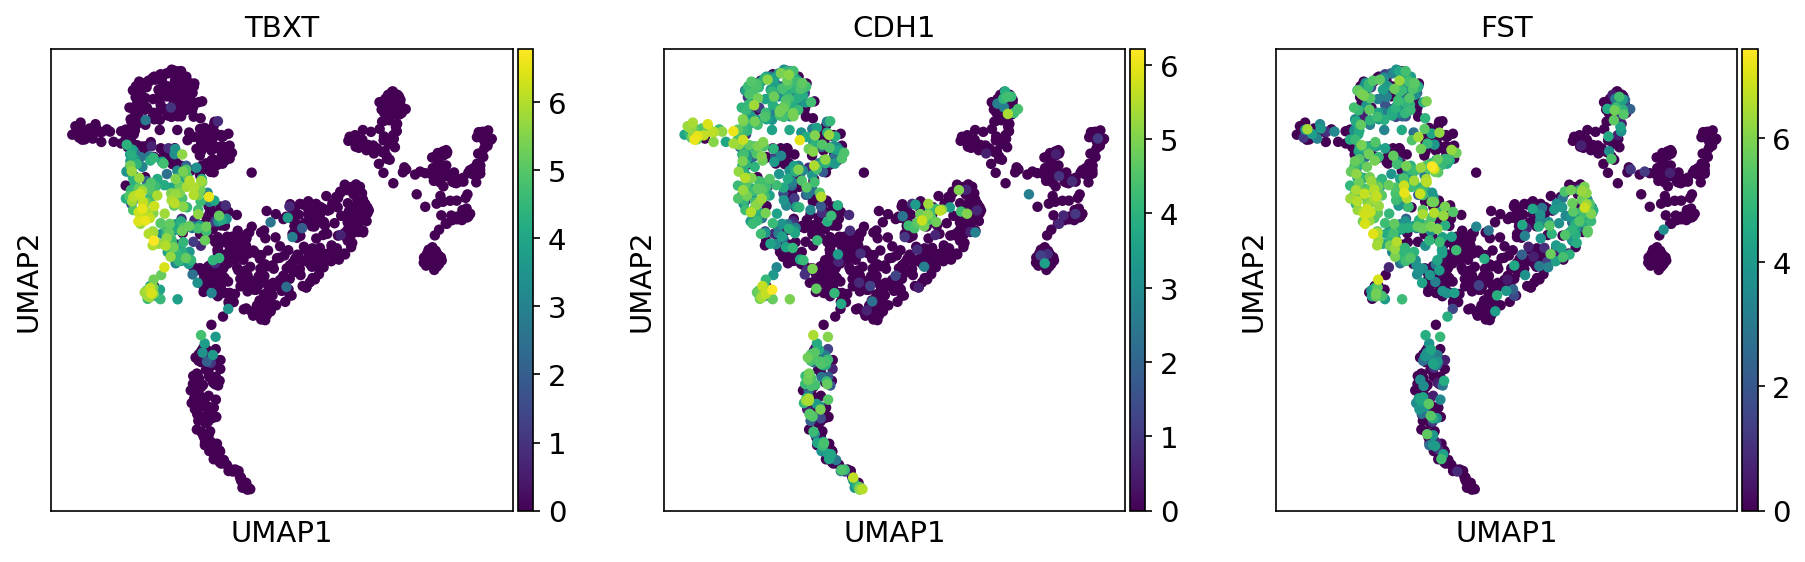

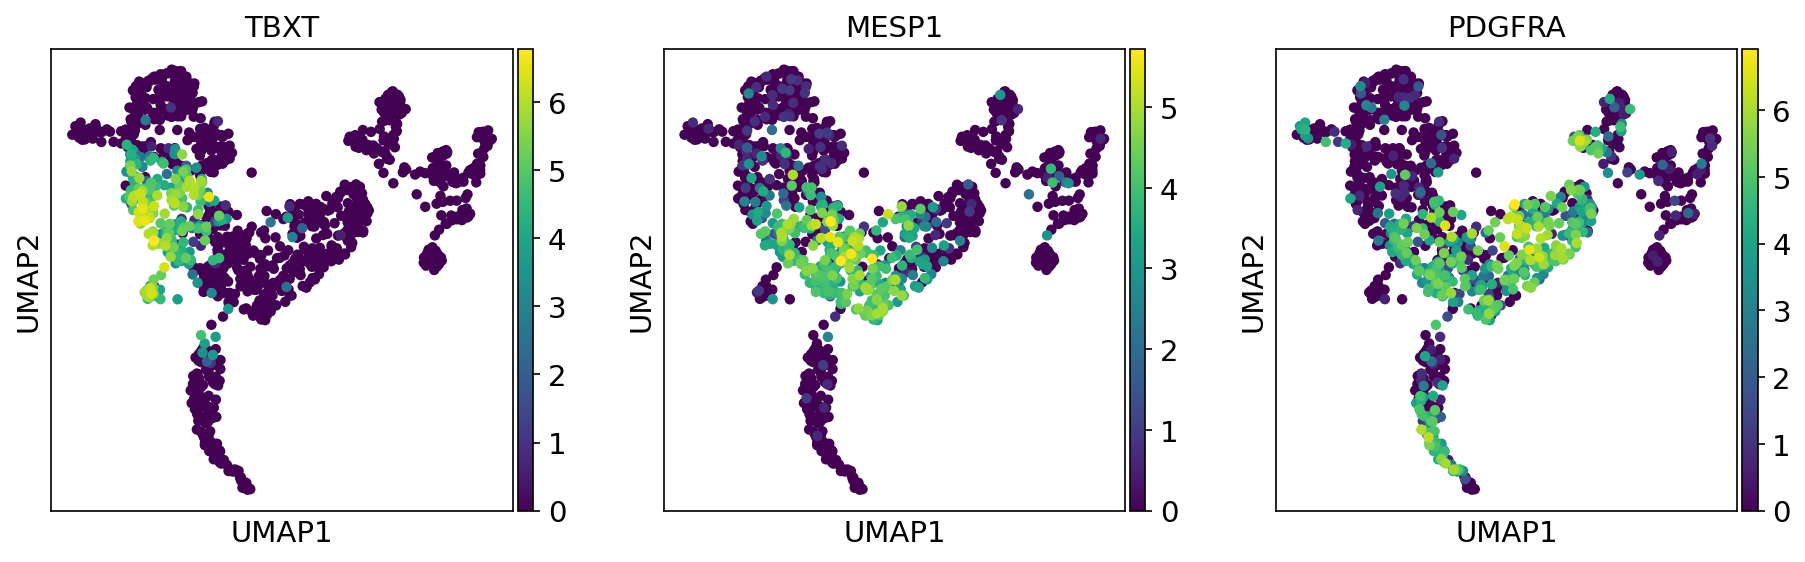

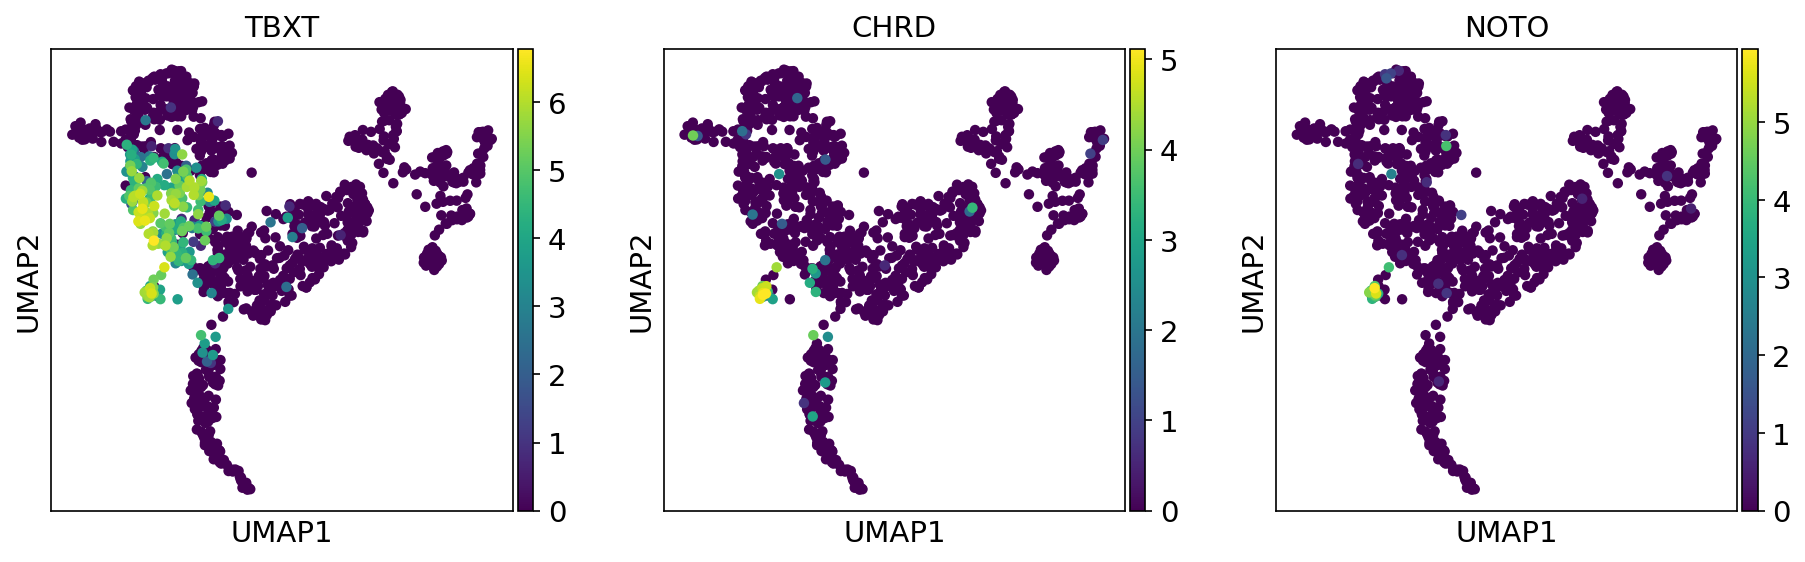

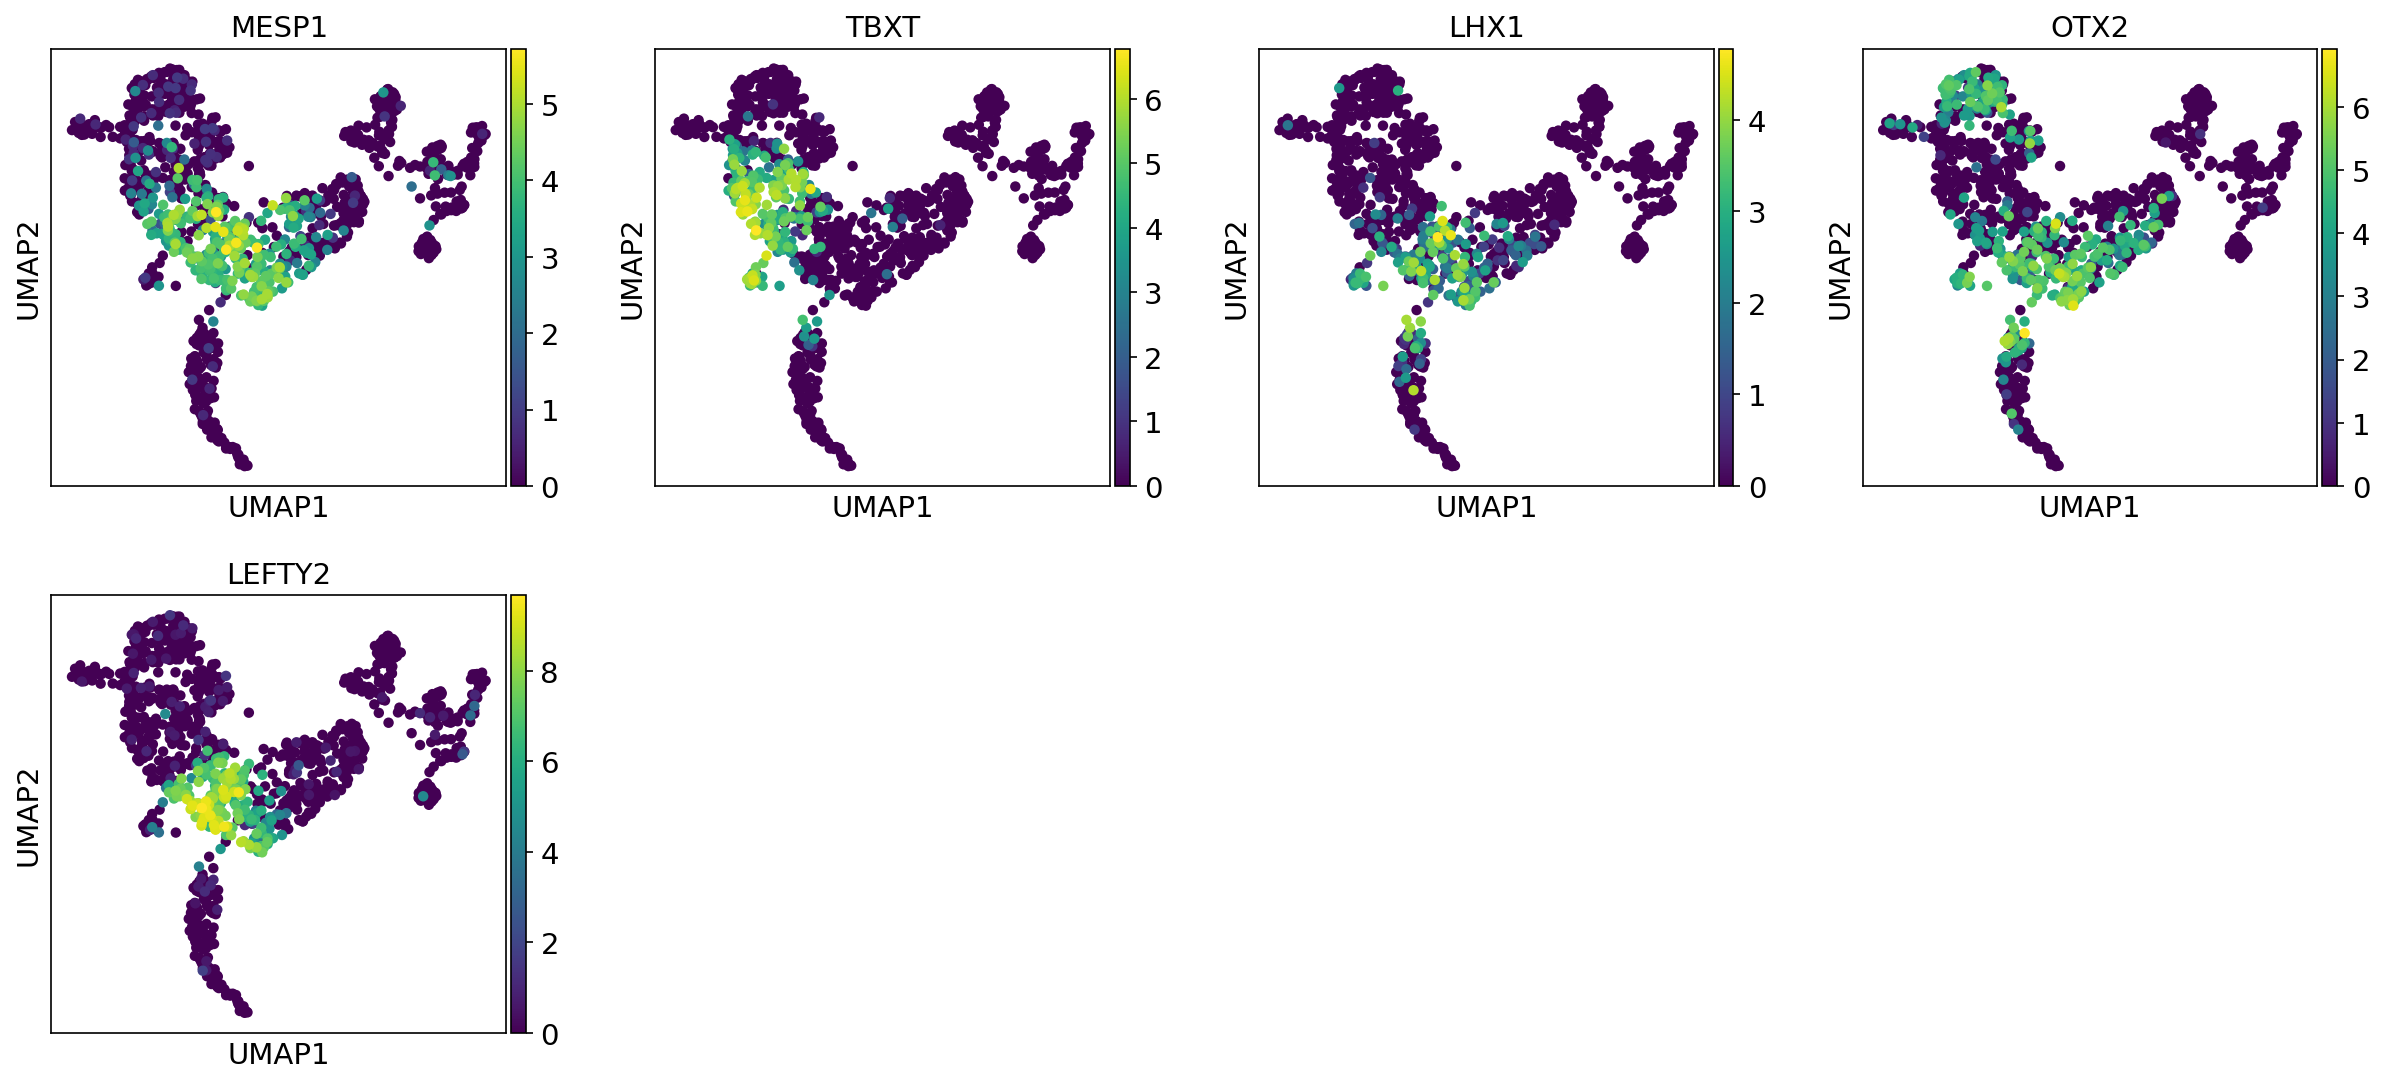

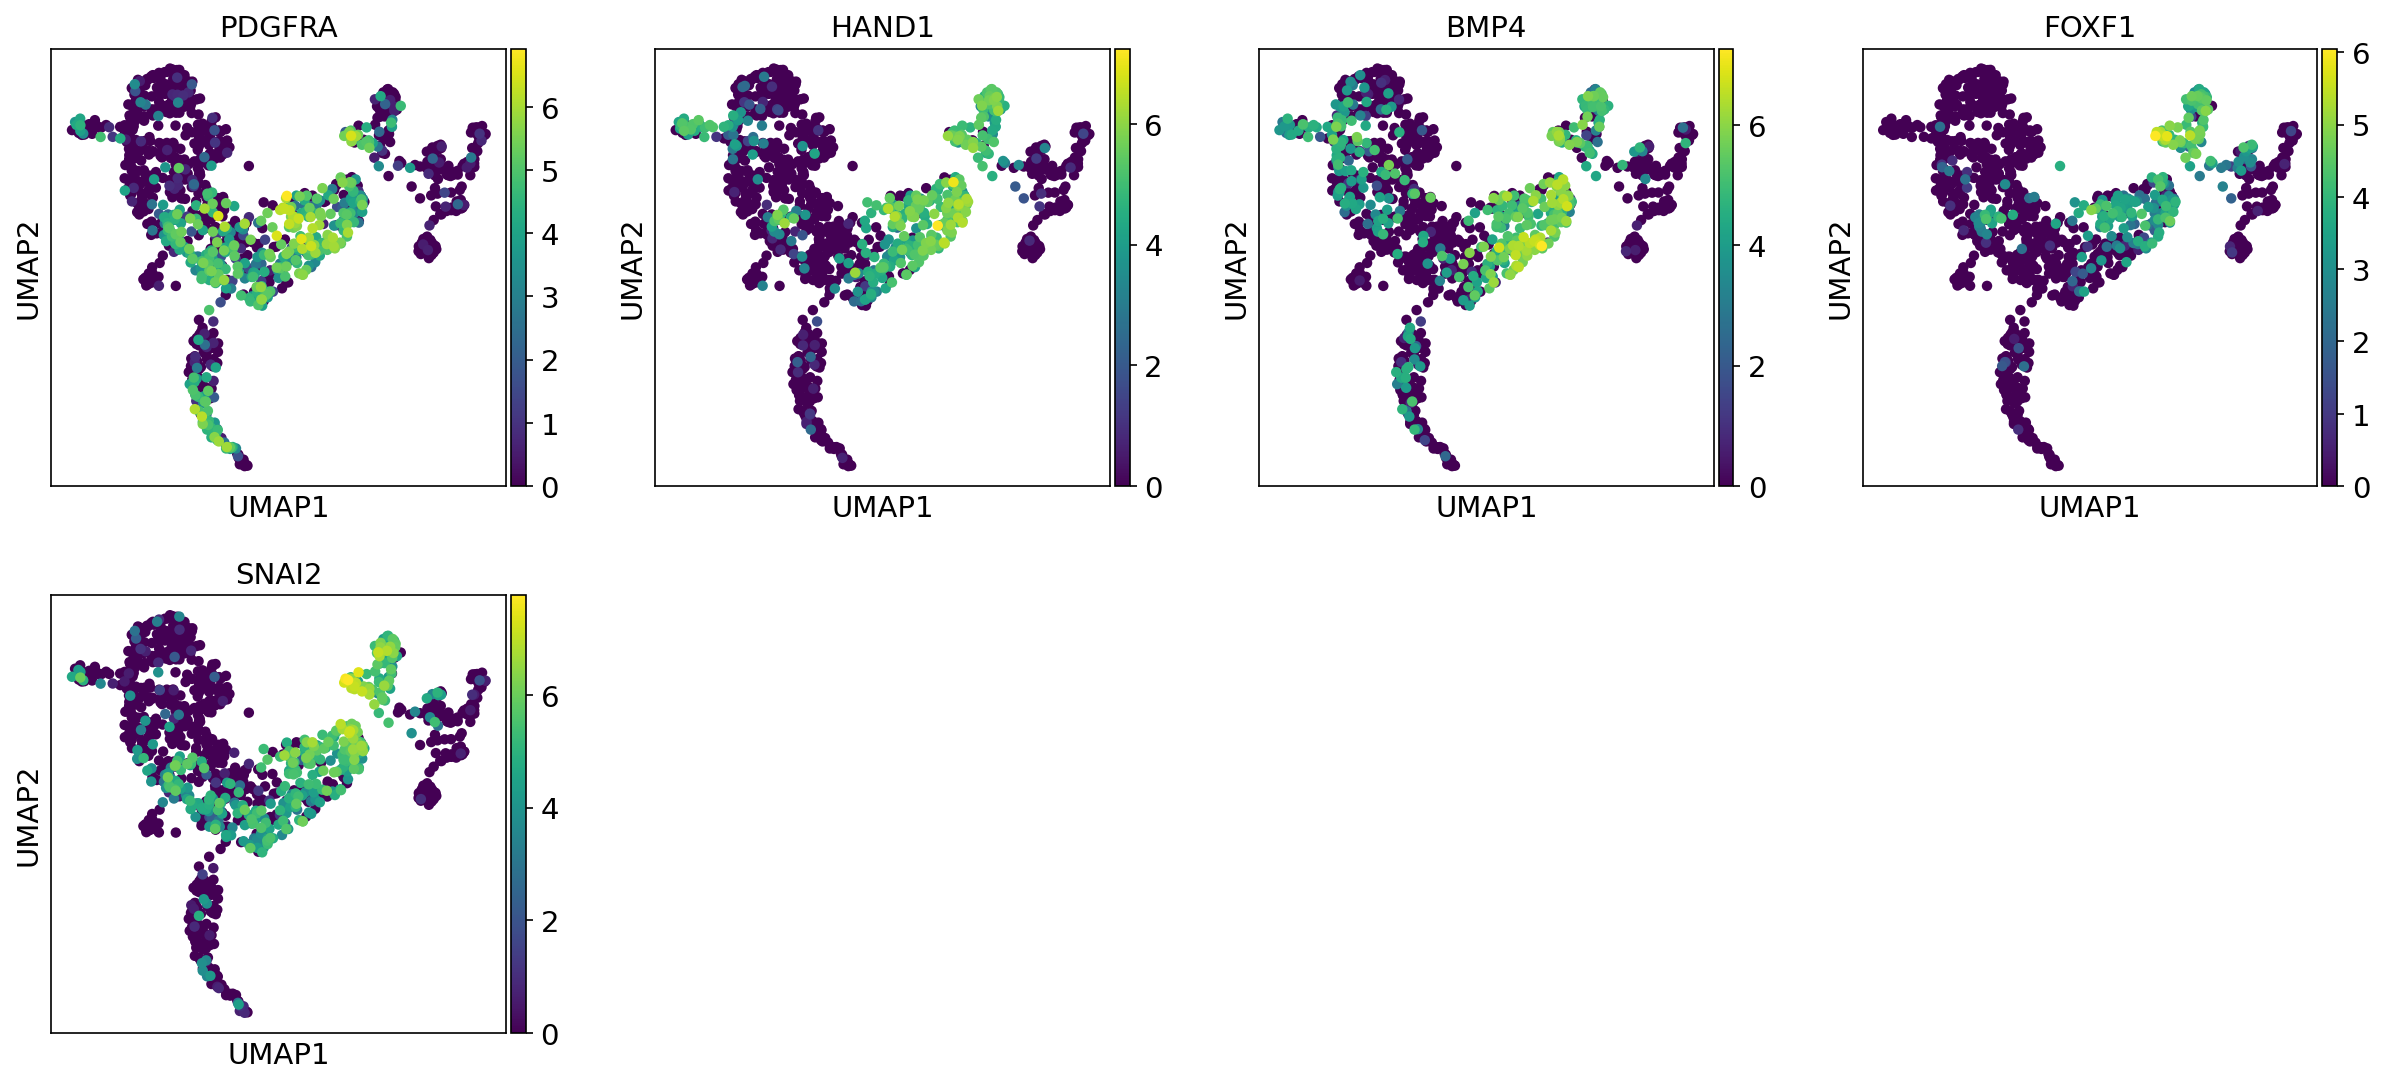

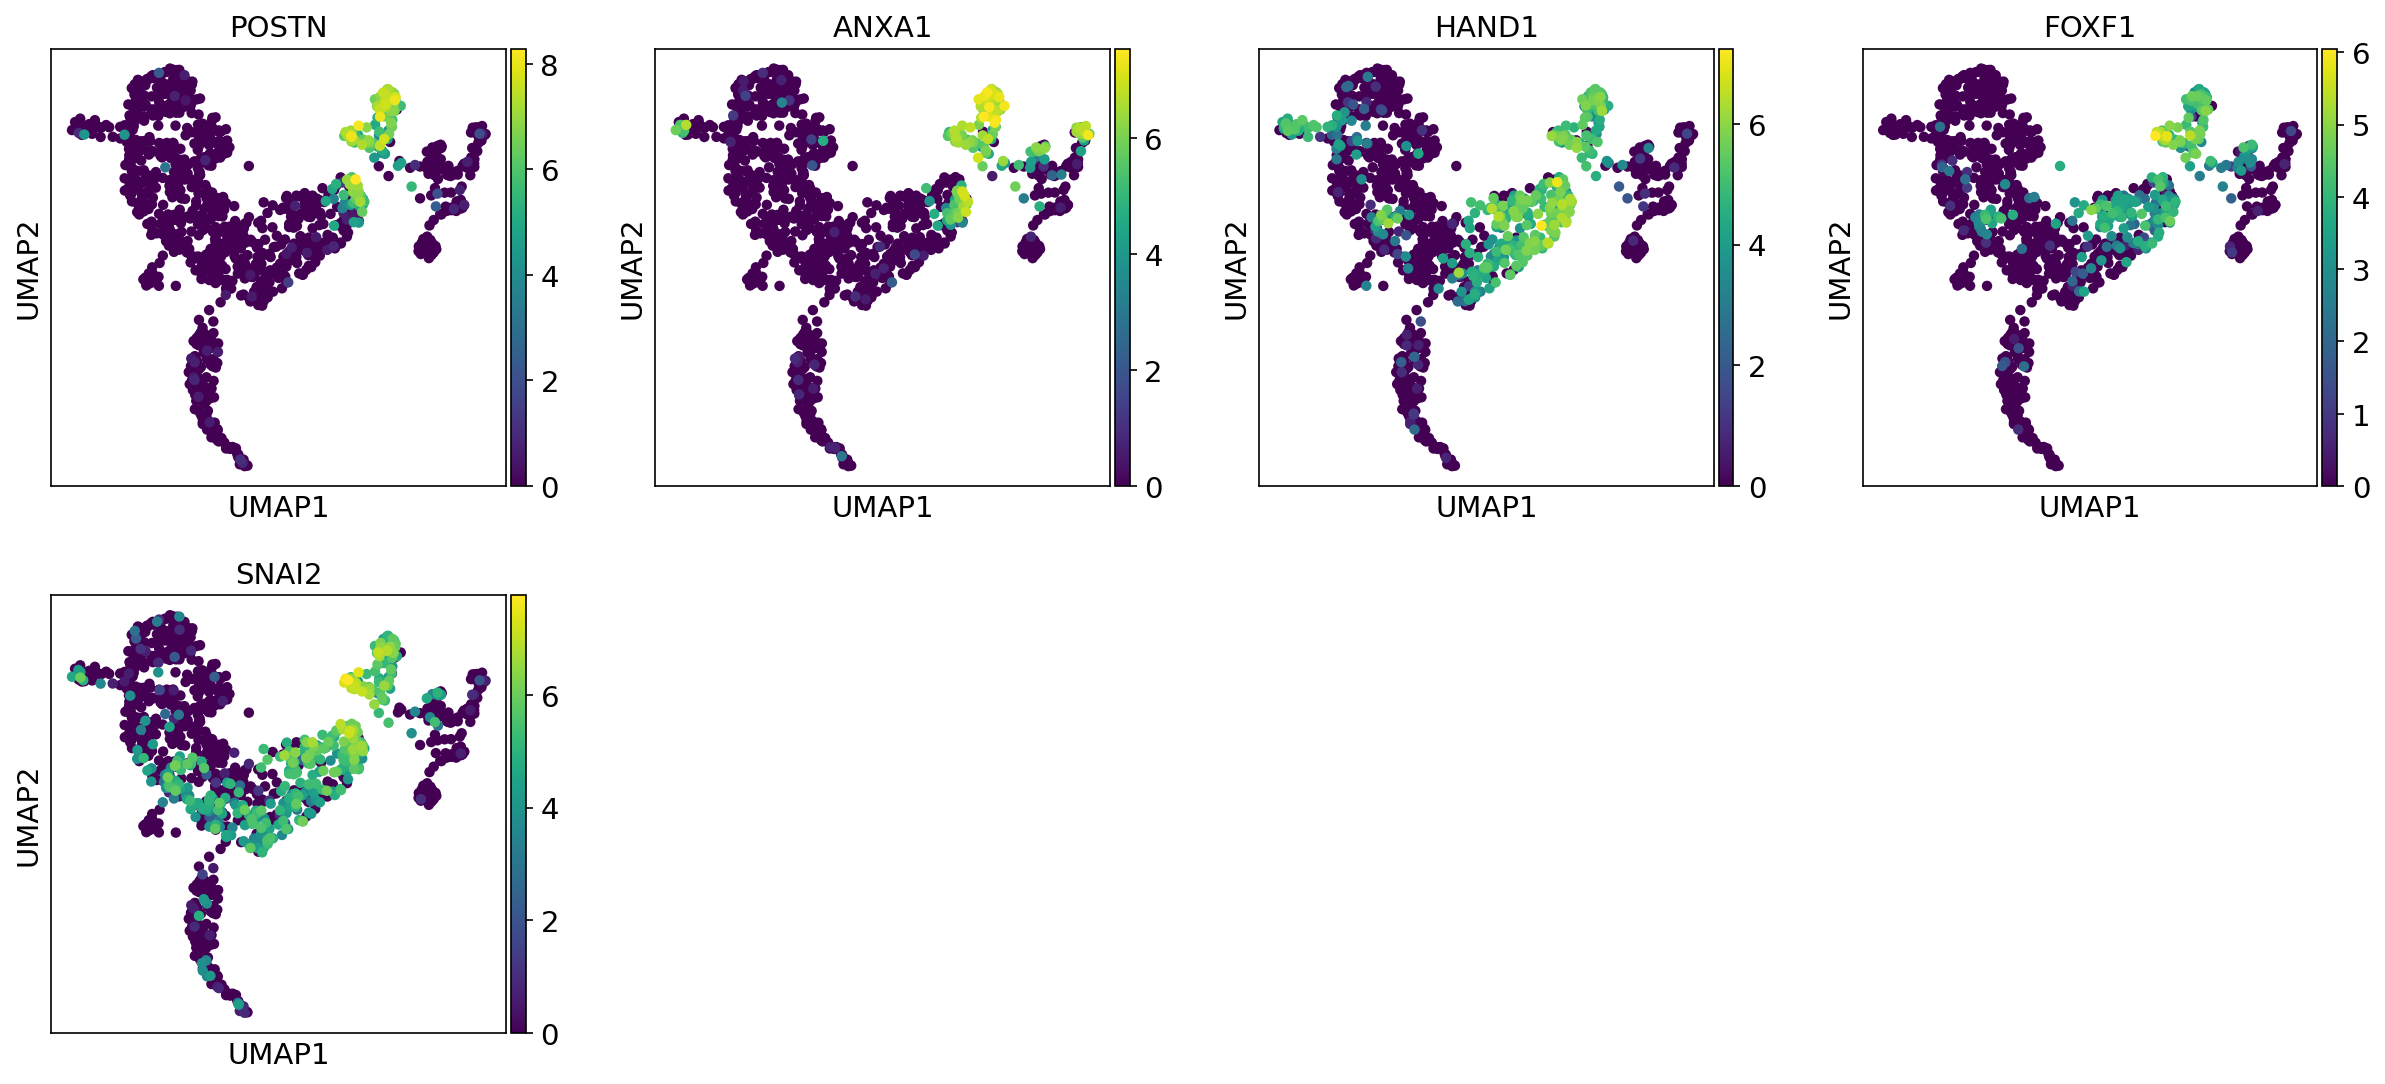

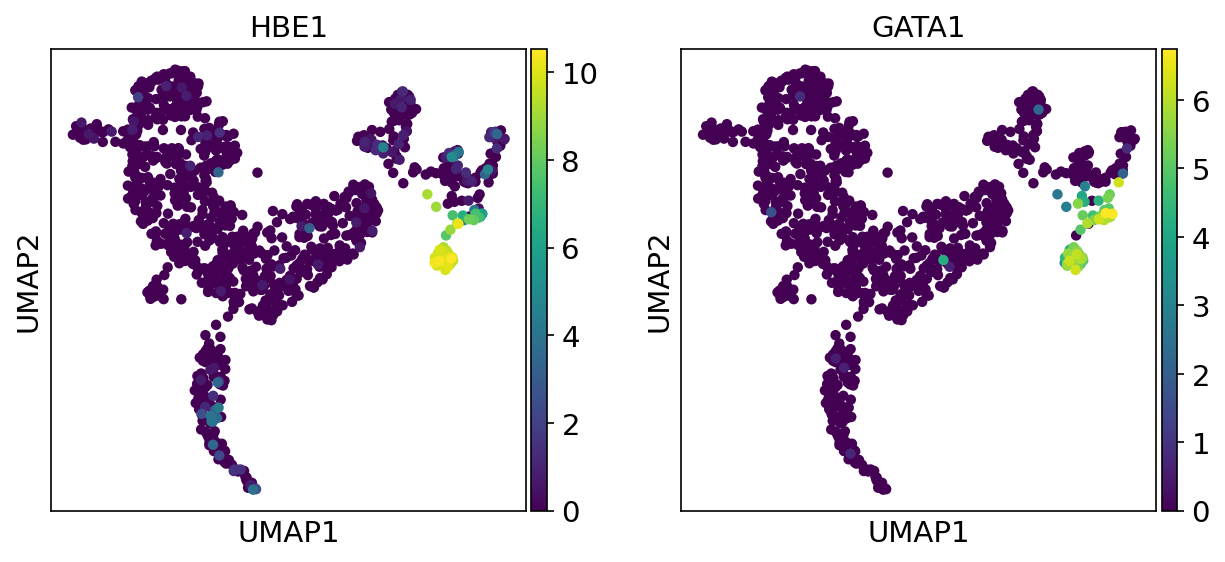

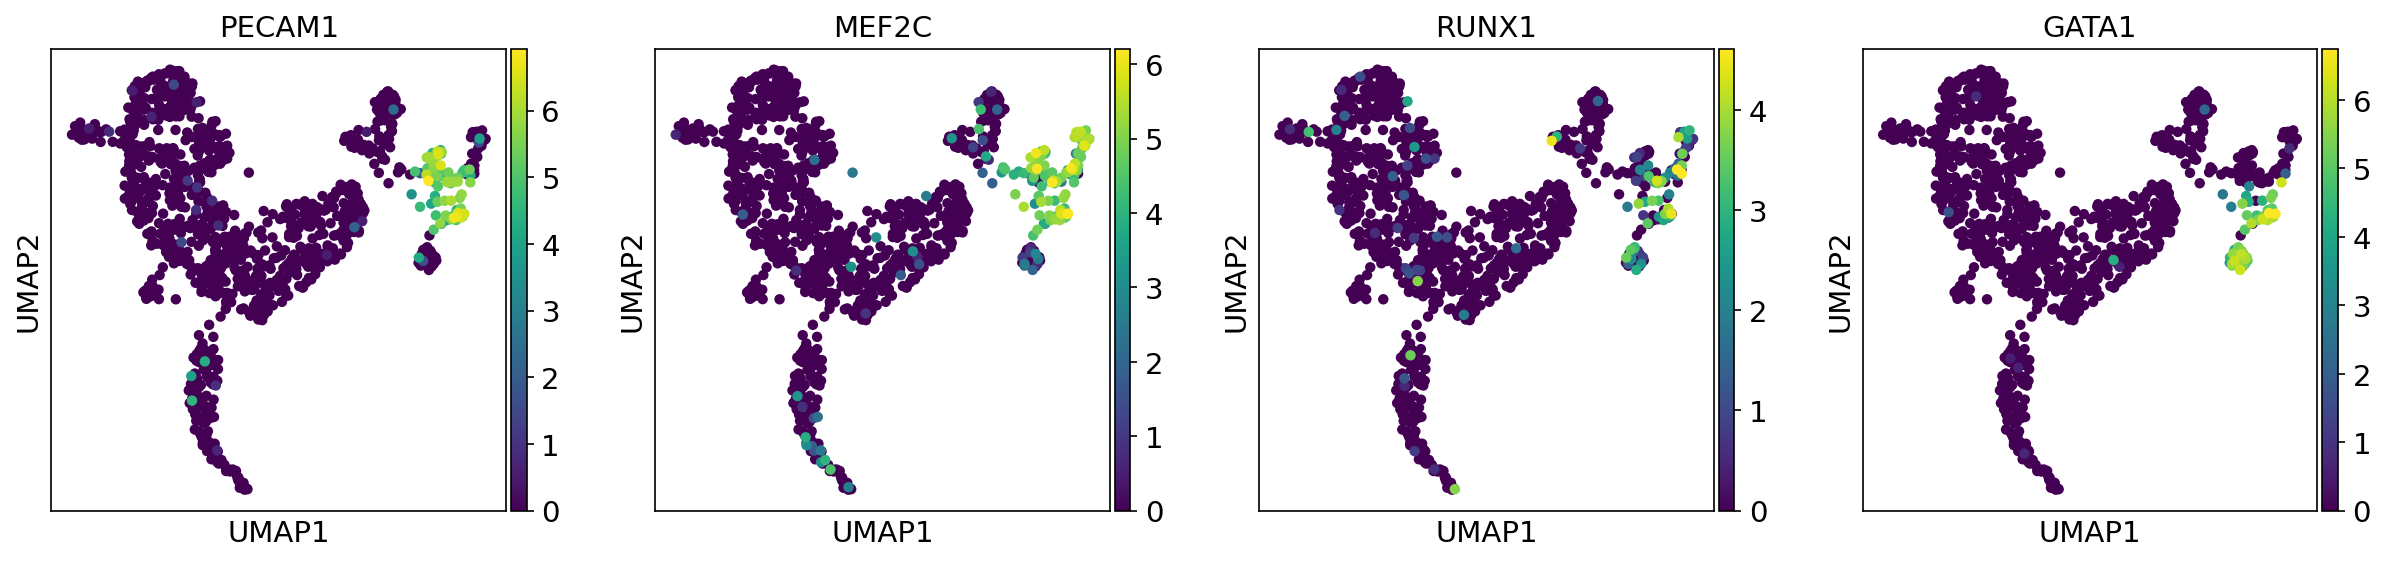

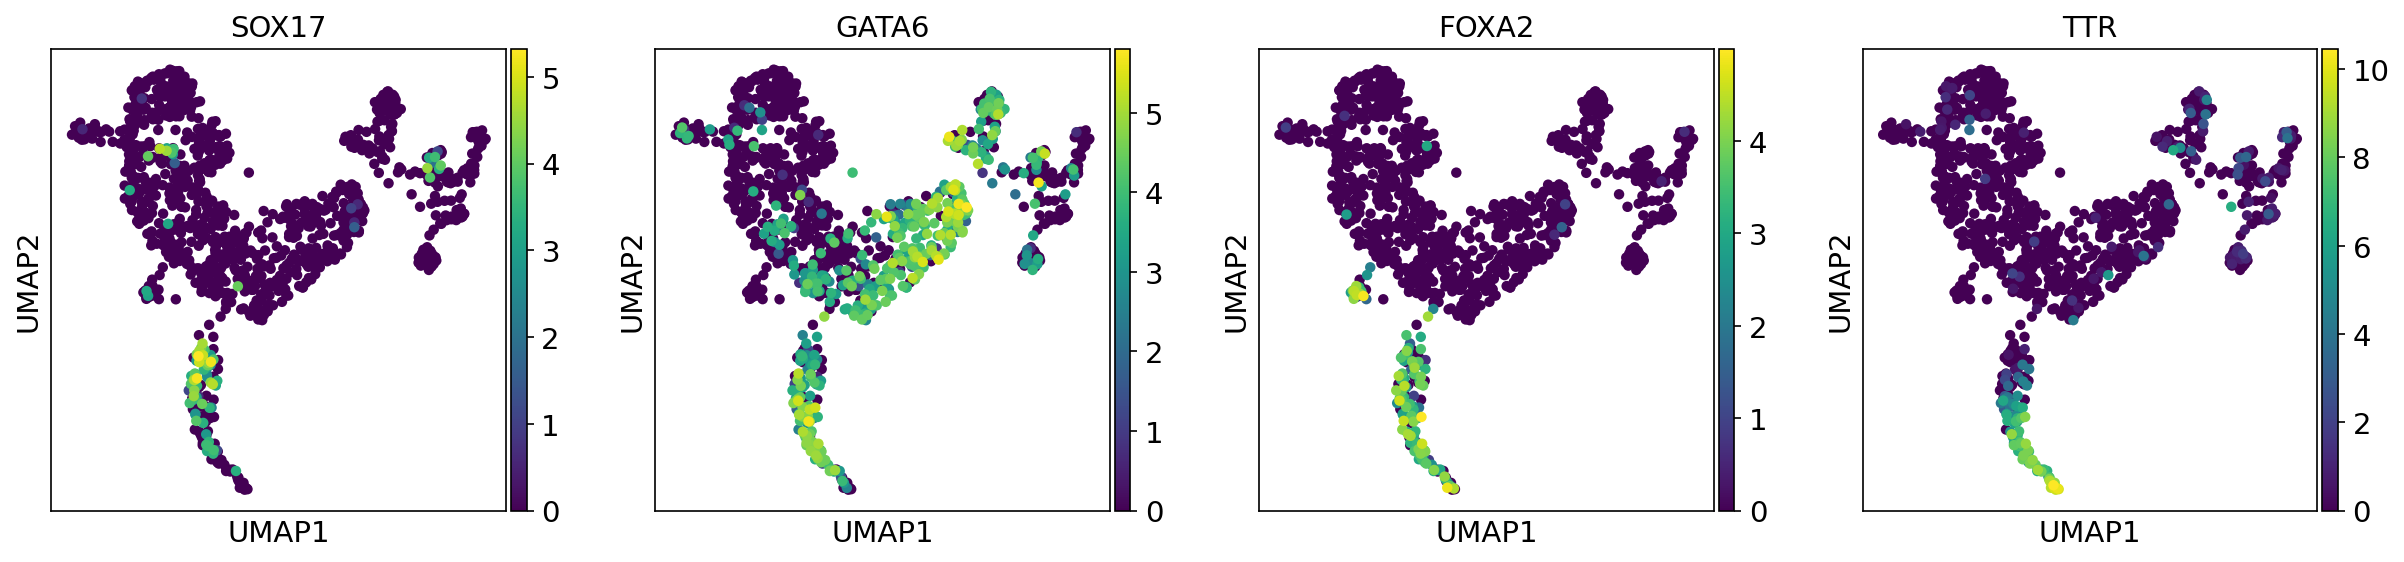

In [6]:
epiblast=['SOX2','OTX2','CDH1']
sc.pl.umap(adata_gastrula,color=epiblast)
ectoderm=['DLX5','TFAP2A','GATA3']
sc.pl.umap(adata_gastrula,color=ectoderm)
primitive_streak=['TBXT','CDH1','FST']
sc.pl.umap(adata_gastrula,color=primitive_streak)
nascent_mesoderm=['TBXT','MESP1','PDGFRA']
sc.pl.umap(adata_gastrula,color=nascent_mesoderm)
axial_mesoderm=['TBXT','CHRD','NOTO']
sc.pl.umap(adata_gastrula,color=axial_mesoderm)
emergent_mesoderm=['MESP1','TBXT','LHX1','OTX2','LEFTY2']
sc.pl.umap(adata_gastrula,color=emergent_mesoderm)
advanced_mesoderm=['PDGFRA','HAND1','BMP4','FOXF1','SNAI2']
sc.pl.umap(adata_gastrula,color=advanced_mesoderm)
yolk_sac_mesoderm=['POSTN','ANXA1','HAND1','FOXF1','SNAI2']
sc.pl.umap(adata_gastrula,color=yolk_sac_mesoderm)
erythrocytes=['HBE1','GATA1']
sc.pl.umap(adata_gastrula,color=erythrocytes)
hemogenic_endothelia_progenitor=['PECAM1','MEF2C','RUNX1','GATA1']
sc.pl.umap(adata_gastrula,color=hemogenic_endothelia_progenitor)
endoderm=['SOX17','GATA6','FOXA2','TTR']
sc.pl.umap(adata_gastrula,color=endoderm)

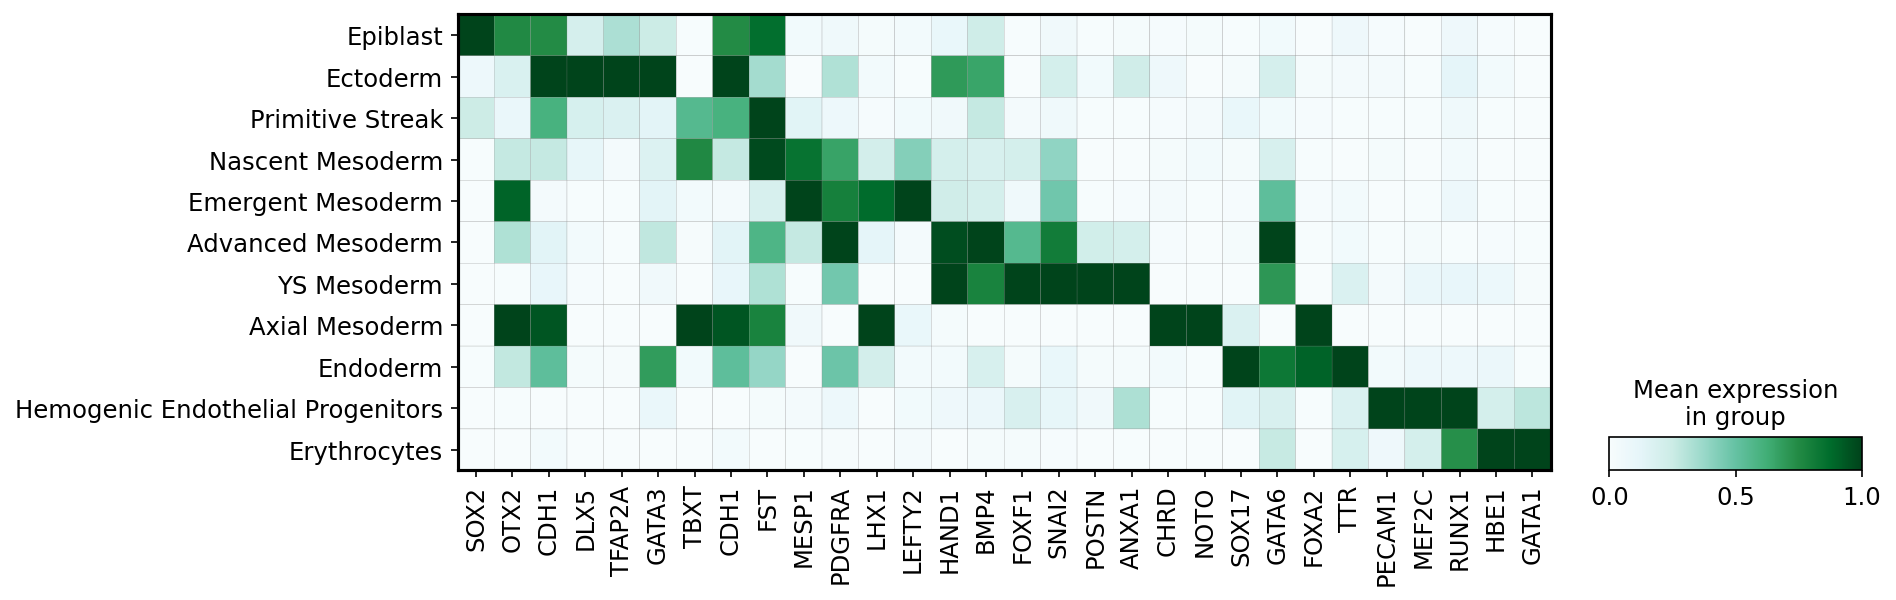

In [7]:
epiblast=['SOX2','OTX2','CDH1']
ectoderm=['DLX5','TFAP2A','GATA3']
primitive_streak=['TBXT','CDH1','FST']
nascent_mesoderm=['MESP1','PDGFRA']
axial_mesoderm=['CHRD','NOTO']
emergent_mesoderm=['LHX1','LEFTY2']
advanced_mesoderm=['HAND1','BMP4','FOXF1','SNAI2']
yolk_sac_mesoderm=['POSTN','ANXA1']
erythrocytes=['HBE1','GATA1']
hemogenic_endothelia_progenitor=['PECAM1','MEF2C','RUNX1']
endoderm=['SOX17','GATA6','FOXA2','TTR']
adata_gastrula.obs['cluster_id'].cat.reorder_categories(['Epiblast','Ectoderm','Primitive Streak','Nascent Mesoderm','Emergent Mesoderm','Advanced Mesoderm','YS Mesoderm','Axial Mesoderm',
'Endoderm','Hemogenic Endothelial Progenitors','Erythrocytes'],inplace=True)
marker_all_v1=epiblast+ ectoderm+primitive_streak+nascent_mesoderm+emergent_mesoderm+advanced_mesoderm+  yolk_sac_mesoderm+axial_mesoderm+  endoderm+hemogenic_endothelia_progenitor+erythrocytes
fig,ax=plt.subplots(figsize=(12,4))
ax=sc.pl.matrixplot(adata_gastrula, marker_all_v1,log=True,figsize=(8,6), groupby='cluster_id',standard_scale='var',dendrogram=False,show=False,cmap='BuGn', linewidths=0,ax=ax)
# plt.savefig("./Paper_figures/human_gastrula_matrixplot.pdf", dpi=300, format='pdf', bbox_inches='tight')

# Read the human PCW3 data

In [8]:
adata_w3=sc.read('./Data/W3_1.h5ad')

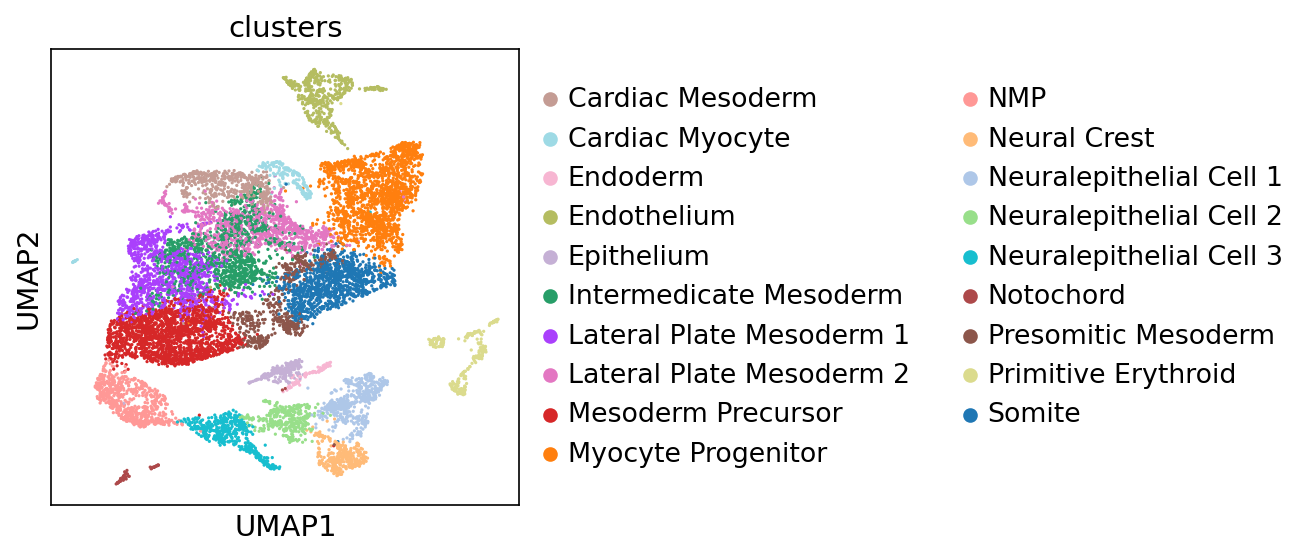

In [10]:
sc.pl.umap(adata_w3,color='clusters')

In [11]:
adata_w3_v1=sc.AnnData(X=adata_w3.raw.X.A,
                      obs=adata_w3.obs,
                      var=adata_w3.var,
                      uns=adata_w3.uns,
                      obsm=adata_w3.obsm)
sc.pp.normalize_total(adata_w3_v1)
sc.pp.log1p(adata_w3_v1)

In [14]:
map_coarse = {}
for c in adata_w3_v1.obs['clusters'].cat.categories:
    map_coarse[c]='PCW3_'+c
adata_w3_v1.obs['cluster_id']=adata_w3_v1.obs['clusters']
adata_w3_v1.obs.replace({'cluster_id':map_coarse},inplace=True)

... storing 'cluster_id' as categorical
... storing 'cluster_id_v1' as categorical


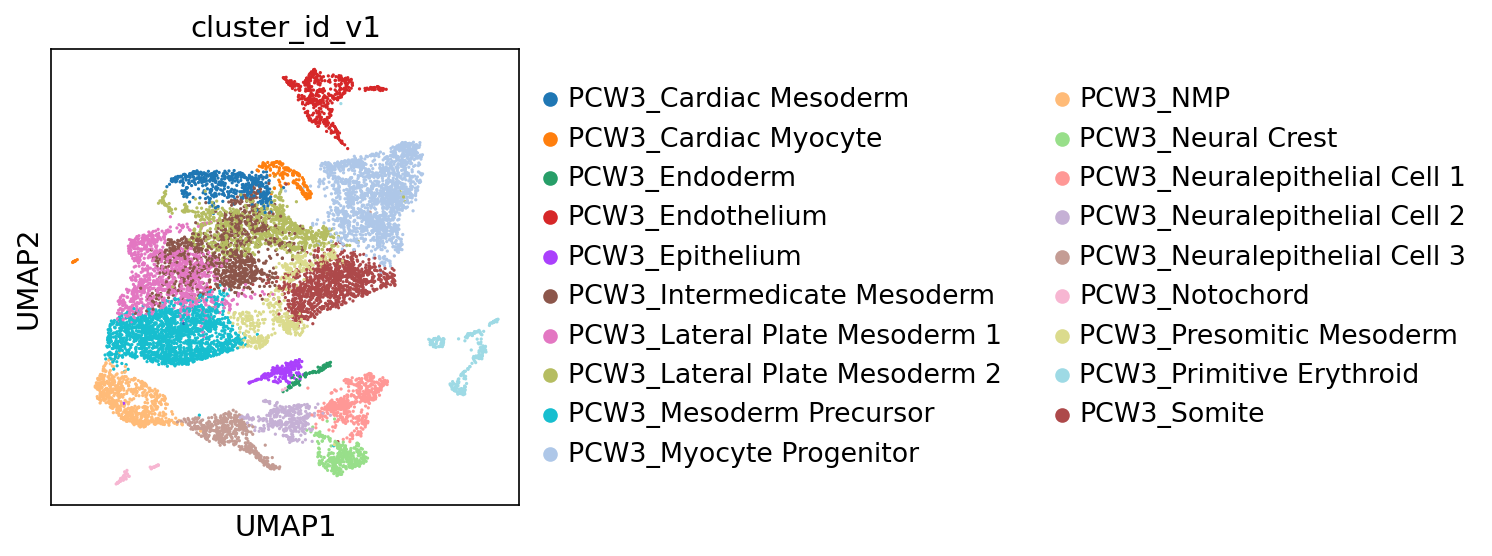

In [15]:
adata_w3_v1.obs['cluster_id_v1']=adata_w3_v1.obs['cluster_id']
sc.pl.umap(adata_w3_v1,color='cluster_id_v1')

# Concatenate human gastrula CS7 and the PCW3 data, prepare h5ad for Seurat CCA analysis

In [16]:
adata = adata_gastrula.concatenate(adata_w3_v1)
adata.write('./data/human_gastrula_pcw3_v1.h5ad')
adata.obs.to_csv('./data/human_gastrula_pcw3_metadata_v1.csv')

... storing 'cluster_id' as categorical
... storing 'sub_cluster' as categorical
... storing 'clusters' as categorical
... storing 'week_stage' as categorical
... storing 'louvain' as categorical
... storing 'clusters_coarse' as categorical
... storing 'clusters_coarse_nonum' as categorical
... storing 'clusters_coarse_epi' as categorical
... storing 'louvain2' as categorical
... storing 'phase' as categorical
... storing 'clusters_coarse_epi_nname' as categorical
... storing 'clusters_coarse_epi_name' as categorical
... storing 'louvain_new' as categorical
... storing 'cluster_id_v1' as categorical
